In [174]:
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict

In [269]:
lim = 1000000
coords = np.random.randint(0, lim, size=(10000000, 2))
me =  np.random.randint(0, lim, size=2)
size = 200

In [281]:
grid_size = 100
step = lim//grid_size
areas = {(i, j): [] for i in range(grid_size) for j in range(grid_size)}

In [283]:
lim / grid_size

10000.0

In [271]:
for c in coords:
    area = c // step
    zones = [area]
    border_dist = c - area * step
    if border_dist[0] <= size:
        zones.append(area + (-1, 0))
        if border_dist[1] <= size:
            zones.append(area + (-1, -1))
        elif border_dist[1] >= step-size:
            zones.append(area + (-1, 1))
    elif border_dist[0] >= step-size:
        zones.append(area + (1, 0))
        if border_dist[1] <= size:
            zones.append(area + (1, -1))
        elif border_dist[1] <= step-size:
            zones.append(area + (1, 1))
    elif border_dist[1] <= size:
        zones.append(area + (0, -1))
    elif border_dist[1] >= step-size:
        zones.append(area + (0, 1))

    for zone in zones:
        try:
            areas[tuple(zone)].append(c)
        except KeyError:
            pass
    

In [248]:
def get_neighbours(co, areas):
    return np.array(areas[tuple(co // step)])

In [272]:
f'Deduplicate data: {sum({k: len(v) for k, v in areas.items()}.values())/len(coords) - 1:.2%}'

'Deduplicate data: 9.79%'

In [273]:
def dist(a, b):
    return ((a[0]-b[0])**2 + (a[1]-b[1])**2)**0.5

In [251]:
near = np.array([c for c in coords if dist(me, c) <= size])

In [274]:
neighbourhood = get_neighbours(me, areas)
near_opti = np.array([c for c in neighbourhood if dist(me, c) <= size])

In [275]:
print(f'{len(near)/len(coords):%} (1/{len(coords)/len(near):.0f})')

0.000030% (1/3333333)


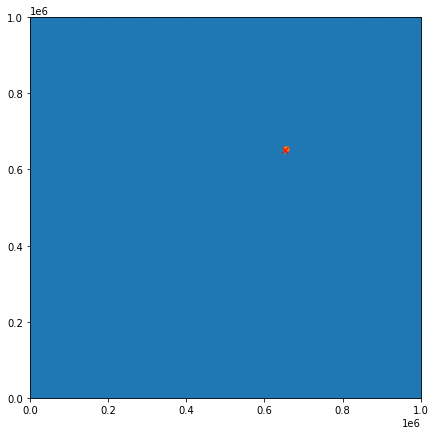

In [276]:
plt.figure(figsize=(7, 7))
plt.ylim(0, lim)
plt.xlim(0, lim)
# plt.xlim(me[0] - size * 1.2, me[0] + size * 1.2)
# plt.ylim(me[1] - size * 1.2, me[1] + size * 1.2)
plt.scatter(coords[:, 0], coords[:, 1], s=0.1, alpha=0.1)
plt.scatter(neighbourhood[:, 0], neighbourhood[:, 1], s=0.1, alpha=0.2)
plt.scatter(near_opti[:, 0], near_opti[:, 1], color='red', s=0.1)
plt.plot(me[0], me[1], 'x', color='red')
ax = plt.gca()
ax.add_patch(plt.Circle(me, size, color='red', fill=False))